In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import altair as alt 

In [9]:
train = pd.read_csv('data/sales_train.csv.gz')
items = pd.read_csv('data/items.csv')
categories = pd.read_csv('data/item_categories.csv')
shops = pd.read_csv('data/shops.csv')

test = pd.read_csv('data/test.csv.gz')
submission = pd.read_csv('data/sample_submission.csv.gz')

In [10]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [11]:
train.shape

(2935849, 6)

In [12]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [13]:
test.shape

(214200, 3)

In [14]:
submission.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


As we can see, the test set is different in size and structure when compared to the training set. We have the features 'shop_id' and 'item_id' in the test set, which are present in the trianing set as well. Each observation in the test set has an ID associated with it. If we look at our submission file, we need to submit the monthly count (item_cnt_month) for that particular ID. This means we need to predict a number for the monthly sale quantity of a particular item at a particular shop.

Let's look at the distribution of the training and test set to understand our dataset better and check for overlap, or lack thereof.

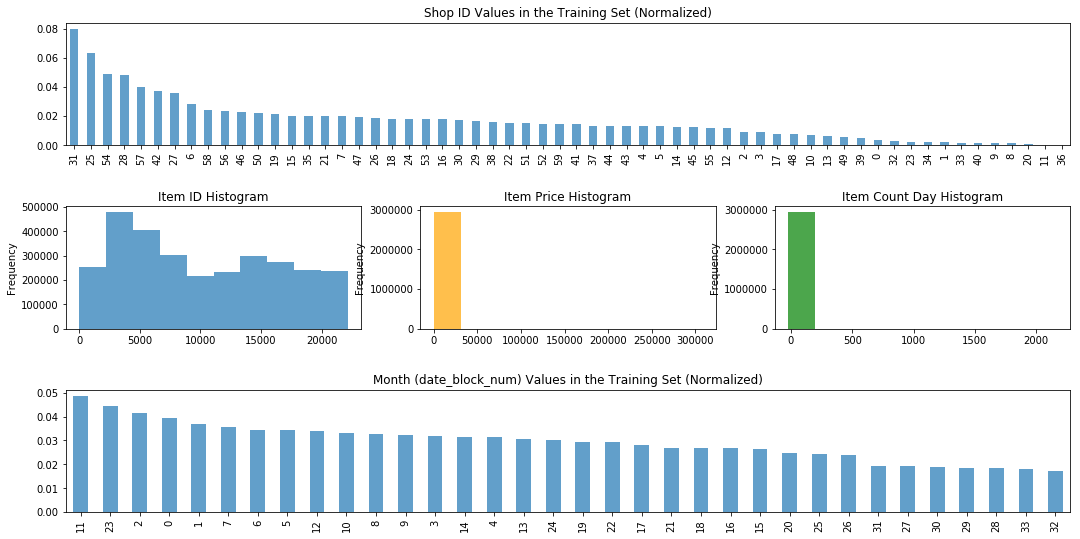

In [15]:
fig = plt.figure(figsize=(18,9))
plt.subplots_adjust(hspace=.5)

plt.subplot2grid((3,3), (0,0), colspan = 3)
train['shop_id'].value_counts(normalize=True).plot(kind='bar', alpha=0.7)
plt.title('Shop ID Values in the Training Set (Normalized)')

plt.subplot2grid((3,3), (1,0))
train['item_id'].plot(kind='hist', alpha=0.7)
plt.title('Item ID Histogram')

plt.subplot2grid((3,3), (1,1))
train['item_price'].plot(kind='hist', alpha=0.7, color='orange')
plt.title('Item Price Histogram')

plt.subplot2grid((3,3), (1,2))
train['item_cnt_day'].plot(kind='hist', alpha=0.7, color='green')
plt.title('Item Count Day Histogram')

plt.subplot2grid((3,3), (2,0), colspan = 3)
train['date_block_num'].value_counts(normalize=True).plot(kind='bar', alpha=0.7)
plt.title('Month (date_block_num) Values in the Training Set (Normalized)')
plt.show()

The above graphs are a nice way to look at the raw distribtion of the test dataset. Here are some observations:

1. We have 60 'shop_id's but there is an uneven distribtution of these in the dataset. Four (<7%) of these shops make up ~25 percent of this dataset. These are shops (31, 25, 54, 28).


2. The Item IDs seem to have variations in frequency. We can't attribute a reason to this yet but we can inspect this further. Certain cateogeries are bound to sell better and maybe items under the same category are closer to each other as far as their ID distributions are concerned


3. From the vast empty spaces in the histograms of 'item_price' and 'item_cnt_day', we can infer that there are outliers in their distribution. **Let's write some simple code below to put a value to these outliers.**


4. Plotting the individual months from January 2013 to October 2015, it is interesting to see that the block month 12, corresponding to December 2013, had the highest number of sales. Month 23, which corresponds to December 2014, had the second highest number of sales. Shortly, we will use some better graphs to observe the monthly sale trends.